<h1>
<center>
Dataquest Guided Project 12:
Analyzing Movie Reviews
</center>
</h1>

## Introduction

This is part of the Dataquest program.

- part of paths **Data Analyst in Python & Data Scientist in Python**
    - Step 5: **Probability and Statistics**
        - Course 1 : **Probability and Statistics in Python : Beginner **
            - Introduction to Statistics
            - Standard deviation and correlation
            - Linear Regression
            - Distribution and Sampling
            
As this is a guided project, we are following and deepening the steps suggested by Dataquest. In this project, we will analyze data on movie review scores.

## Use case : Movie review scores

The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from [FiveThirthyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/) 
Each row represents a single movie. Each column contains information about how the online movie review services [RottenTomatoes](http://rottentomatoes.com/), [Metacritic](http://metacritic.com/), [IMBD](http://www.imdb.com/) and [Fandango](http://www.fandango.com/) rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of scores : 

- **User** scores which aggregate user reviews
- **Critic** score which aggregate professional critical reviews of the movie. 

Each service puts their rating on a different scale : 

- **RottenTomatoes** : 0 - 100, in increments of 1
- **Metacritic** : 0 - 100, in increments of 1
- **IMDB** : 0 - 10, in increments of 0.1
- **Fandango** : 0 - 5, in increments of 0.5

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset : 

| Header | Definition   |
|------|------|
|   **FILM**  | the name of the movie|
|   **RottenTomatoes**  | the RottenTomatoes (RT) critic score|
|   **RottenTomatoes_User**  | the RT user score|
|   **Metacritic**  | The Metacritic critic score|
|   **Metacritic_User**  | The Metacritic user score|
|   **IMDB**  | The IMDB score given to the movie|
|   **Fandango_Stars**  | The number of stars Fandango gave the movie|

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix *_norm* is the corresponding column changed to a 0-5 scale. For example, *RT_norm* takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix *_round* is the rounded version of another column. For example, *RT_user_norm_round* rounds the *RT_user_norm* column to the nearest 0.5.

We'll focus on comparing the Metacritics and the Fandango reviews. 

## Read the Movie Reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import linregress

sns.set(font_scale=1.4)
sns.set_palette('husl')
sns.set_style('white')

In [2]:
movies = pd.read_csv("fandango_score_comparison.csv")

In [3]:
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


## Plot histograms

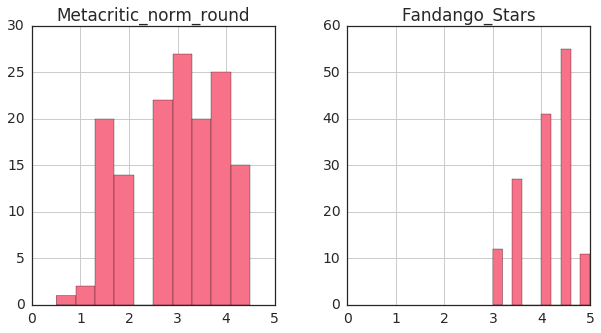

In [4]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10,5))

movies.hist("Metacritic_norm_round", ax=ax[0]);
ax[0].set_xlim(0,5);
movies.hist("Fandango_Stars", ax=ax[1]);
ax[1].set_xlim(0,5);

The scale seems to be different: there are no notes below 3 in the Fandango reviews. We'll dive into statistics to know more about that. 

## Mean, median and standard deviation

In [5]:
mean_fandango = movies['Fandango_Stars'].mean()
mean_metacritic = movies['Metacritic_norm_round'].mean()

median_fandango = movies['Fandango_Stars'].median()
median_metacritic = movies['Metacritic_norm_round'].median()

std_fandango = movies['Fandango_Stars'].std()
std_metacritic = movies['Metacritic_norm_round'].std()

print("Mean value for Fandando is {}".format(mean_fandango))
print("Mean value for Metacritic is {}".format(mean_metacritic))
print(" ")
print("Median value for Fandando is {}".format(median_fandango))
print("Median value for Metacritic is {}".format(median_metacritic))
print(" ")
print("Standard deviation value for Fandando is {}".format(std_fandango))
print("Standard deviation value for Metacritic is {}".format(std_metacritic))

Mean value for Fandando is 4.089041095890411
Mean value for Metacritic is 2.9726027397260273
 
Median value for Fandando is 4.0
Median value for Metacritic is 3.0
 
Standard deviation value for Fandando is 0.5403859779787334
Standard deviation value for Metacritic is 0.9909605613743359


### Comments 

Fandango methodology is not precisely described in there website and seems a bit unclear.

Metacritic uses a weighted average to create the review score. The weights are assigned depending on quality and overall stature of the ratings. The method is described [here](http://www.metacritic.com/about-metascores). They publish each critic rating and are transparent about how they aggregate the reviews to get a final rating.

Fandango mean and median are high (both equal to 4), whereas Metacritic's are close to 3.We can note that, contrary to Metacritic, the median value for Fandango is lower than the mean, proving that there are a few of low ratings. 

Fandango's standard deviation is lower than Metacritic. The values (0.54) shows that the values are not spread a lot, compared to Metacritic. 

## Scatter plots

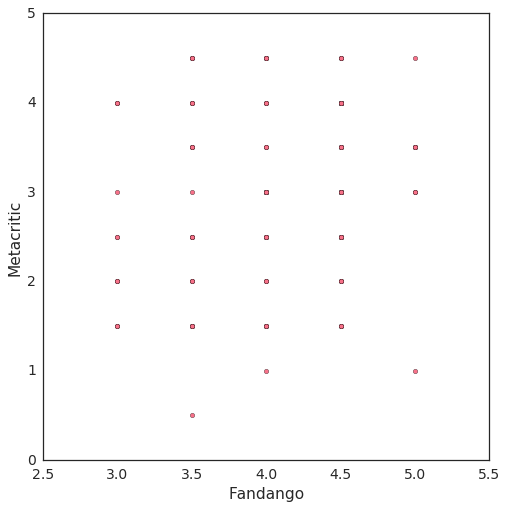

In [6]:
ax = movies.plot(kind="scatter", x="Fandango_Stars", y="Metacritic_norm_round", figsize=(8,8));
ax.set(xlabel='Fandango', ylabel='Metacritic');

Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns.

In [7]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]
movies["fm_diff"] = movies["fm_diff"].abs()

movies = movies.sort_values(by="fm_diff", ascending=False)
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


The difference can go up to 4.0, which is huge for a 5 stars ratings.
Thus, let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help us determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings. 

## Correlations

In [8]:
r, p = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("The coefficient correlation is {}".format(r))

The coefficient correlation is 0.17844919073895918


The coerrelation is fairly low. It shows that Fandango method is fundamentally different than Metacritic's. If the score is just inflated, it's is not done the same way for all the movies.

Even if we know that the correlation is low, let's try to create a linear regression between the two rating systems (for pratice prurpose) : 

In [9]:
regression = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"]);

We can use this regression to compute the score a movie would got with Fandango knowing the Metacritic score.

Let's predict what movies that got 3.0, 1.0 or 5.0 in Metacritic would get.

In [10]:
pred_1 = 1 * regression.slope + regression.intercept
print("A movie that got a 1.0 in Metacritic would get a {} on Fandango".format(pred_1))

pred_3 = 3 * regression.slope + regression.intercept
print("A movie that got a 3.0 in Metacritic would get a {} on Fandango".format(pred_3))

pred_5 = 5 * regression.slope + regression.intercept
print("A movie that got a 5.0 in Metacritic would get a {} on Fandango".format(pred_5))

A movie that got a 1.0 in Metacritic would get a 3.897084996873347 on Fandango
A movie that got a 3.0 in Metacritic would get a 4.091707152821204 on Fandango
A movie that got a 5.0 in Metacritic would get a 4.28632930876906 on Fandango


This model is not accurate as we showed previously that the Pearson correlation coefficient was low. 

## Finding Residuals

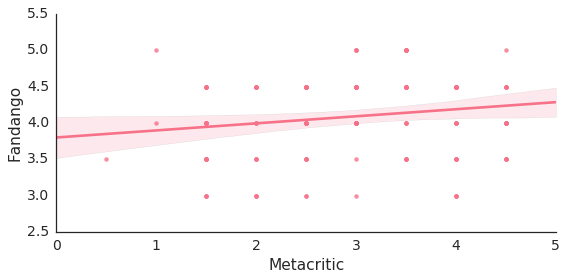

In [11]:
ax = sns.lmplot(data=movies, x="Metacritic_norm_round", y="Fandango_Stars", size=4, aspect=2);
ax.set(xlabel='Metacritic', ylabel='Fandango');

In [12]:
print("The standard error of the slope coefficient is {}. It represents the average distance that our observed values deviate from the regression line".format(regression.stderr))

The standard error of the slope coefficient is 0.0447135446567983. It represents the average distance that our observed values deviate from the regression line


Let's plot the residual plot:

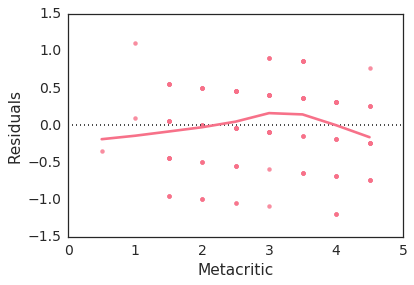

In [13]:
ax = sns.residplot(data=movies, x="Metacritic_norm_round", y="Fandango_Stars", lowess=True)
ax.set(xlabel='Metacritic', ylabel='Residuals');

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. It is not the case here.
We can have legitimate doubts about Fandango's method to rate films. [This article](https://fivethirtyeight.com/features/fandango-movies-ratings/) explains why.